In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/preprocessed_train_dataset.csv')

In [3]:
sns.set_theme(style="whitegrid", palette="pastel")

In [4]:
# Basic Information
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774149 entries, 0 to 774148
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Customer_ID          774147 non-null  float64
 1   outlet_city          774149 non-null  object 
 2   luxury_sales         774149 non-null  float64
 3   fresh_sales          774149 non-null  float64
 4   dry_sales            774149 non-null  float64
 5   cluster_category     774149 non-null  int64  
 6   outliers_luxury      774149 non-null  int64  
 7   outliers_fresh       774149 non-null  int64  
 8   outliers_dry         774149 non-null  int64  
 9   outlet_city_encoded  774149 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 59.1+ MB


,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_category,outliers_luxury,outliers_fresh,outliers_dry,outlet_city_encoded
count,7.741470e+05,774149.000000,774149.000000,774149.000000,774149.000000,774149.000000,774149.0,774149.0,774149.000000
mean,1.038708e+07,1921.991930,4428.673308,4676.302562,3.292104,0.045291,0.0,0.0,10.724813
std,2.234797e+05,1004.103989,3334.635179,3409.412526,1.867014,0.207942,0.0,0.0,6.176585
min,1.000000e+07,500.000000,500.000000,500.000000,1.000000,0.000000,0.0,0.0,1.000000
25%,1.019354e+07,1213.530000,1620.190000,1787.940000,2.000000,0.000000,0.0,0.0,5.000000
50%,1.038708e+07,1715.300000,3356.540000,3727.760000,3.000000,0.000000,0.0,0.0,10.000000
75%,1.058062e+07,2338.700000,6671.600000,7162.200000,5.000000,0.000000,0.0,0.0,16.000000
max,1.077415e+07,6999.650000,13997.900000,13999.300000,6.000000,1.000000,0.0,0.0,21.000000


In [5]:
#Check for missing values
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
Customer_ID            2
outlet_city            0
luxury_sales           0
fresh_sales            0
dry_sales              0
cluster_category       0
outliers_luxury        0
outliers_fresh         0
outliers_dry           0
outlet_city_encoded    0
dtype: int64


<ipython-input-6-d4dfe77c779a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='cluster_category', palette="viridis")


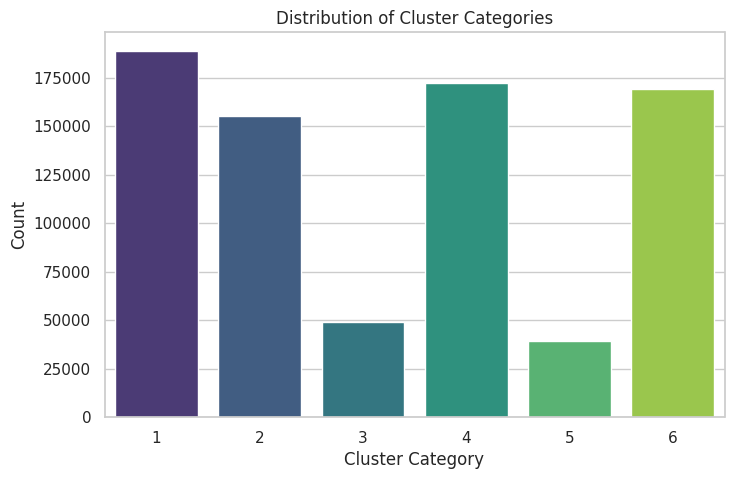

In [6]:
# Distribution of Target Variable (Cluster Categories)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='cluster_category', palette="viridis")
plt.title("Distribution of Cluster Categories")
plt.xlabel("Cluster Category")
plt.ylabel("Count")
plt.show()


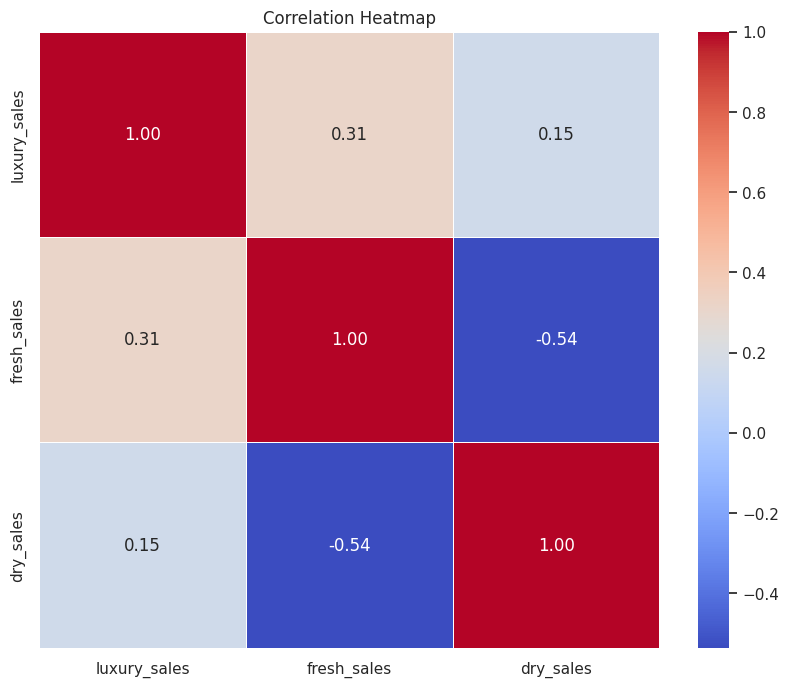

In [7]:
# Correlation heat map
numeric_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']
numeric_data = data[numeric_columns]

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


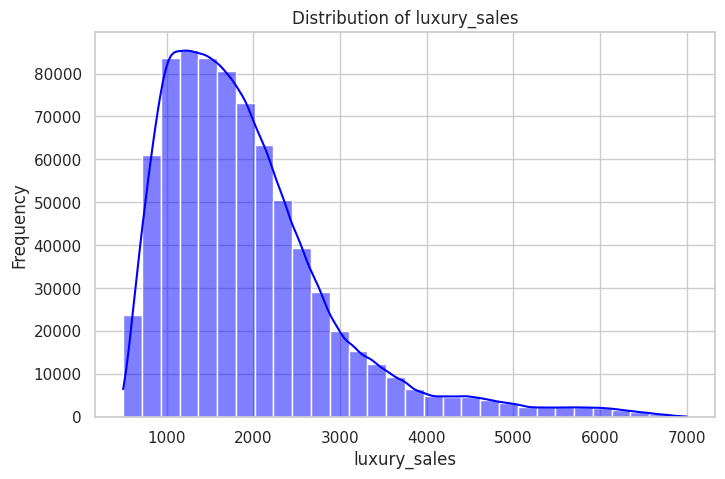

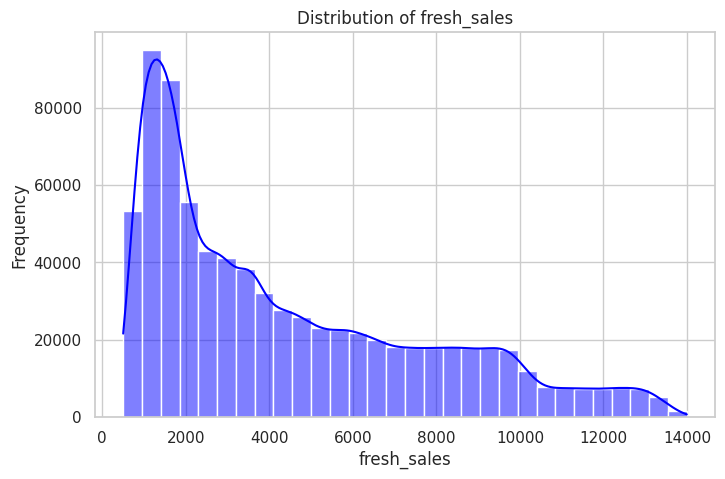

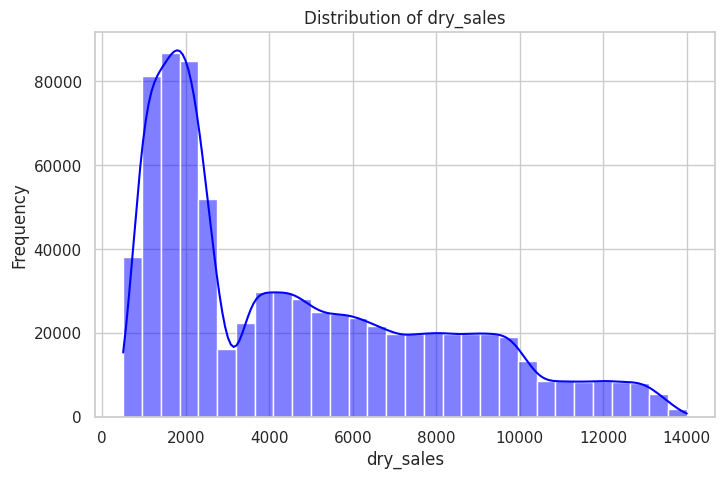

In [8]:
#Distribution of Sales Features
sales_features = ['luxury_sales', 'fresh_sales', 'dry_sales']
for feature in sales_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

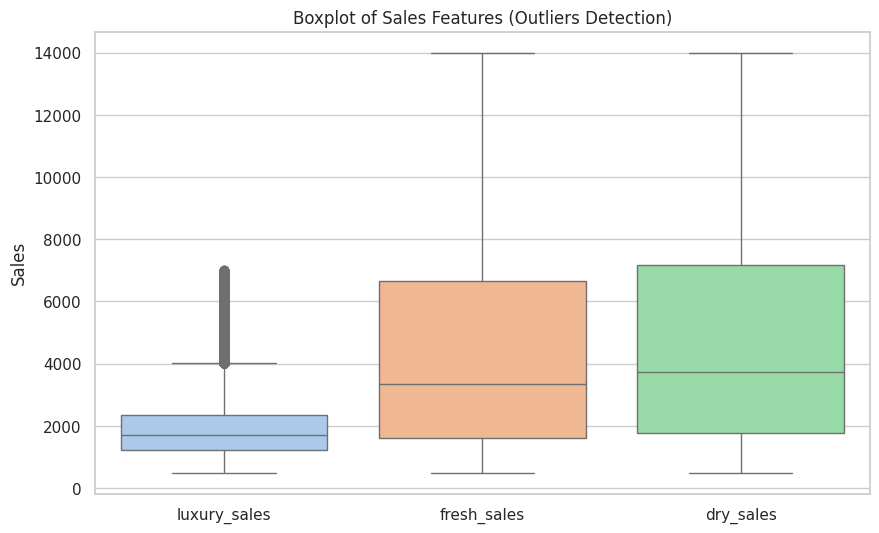

In [9]:
#Outlier Detection using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[sales_features])
plt.title("Boxplot of Sales Features (Outliers Detection)")
plt.ylabel("Sales")
plt.xticks(range(len(sales_features)), sales_features)
plt.show()

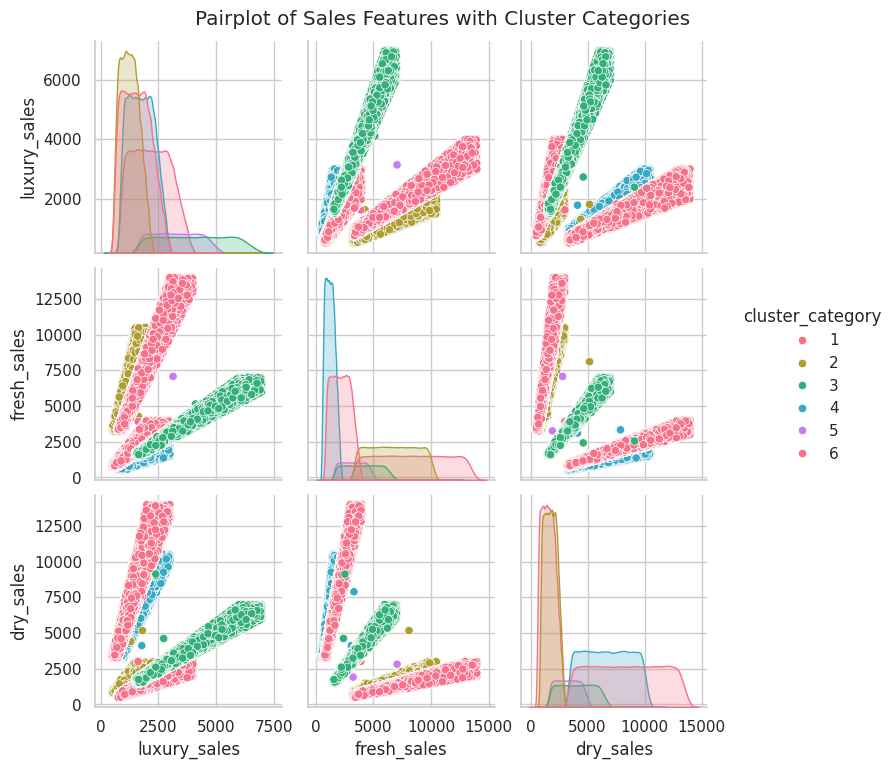

In [10]:
# Pairplot for Feature Relationships
sns.pairplot(data=data, vars=sales_features, hue='cluster_category', palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Sales Features with Cluster Categories", y=1.02)
plt.show()

<ipython-input-11-0045ddc55fcb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_category', y=feature, data=data, palette="Set3")
<ipython-input-11-0045ddc55fcb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_category', y=feature, data=data, palette="Set3")
<ipython-input-11-0045ddc55fcb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_category', y=feature, data=data, palette="Set3")


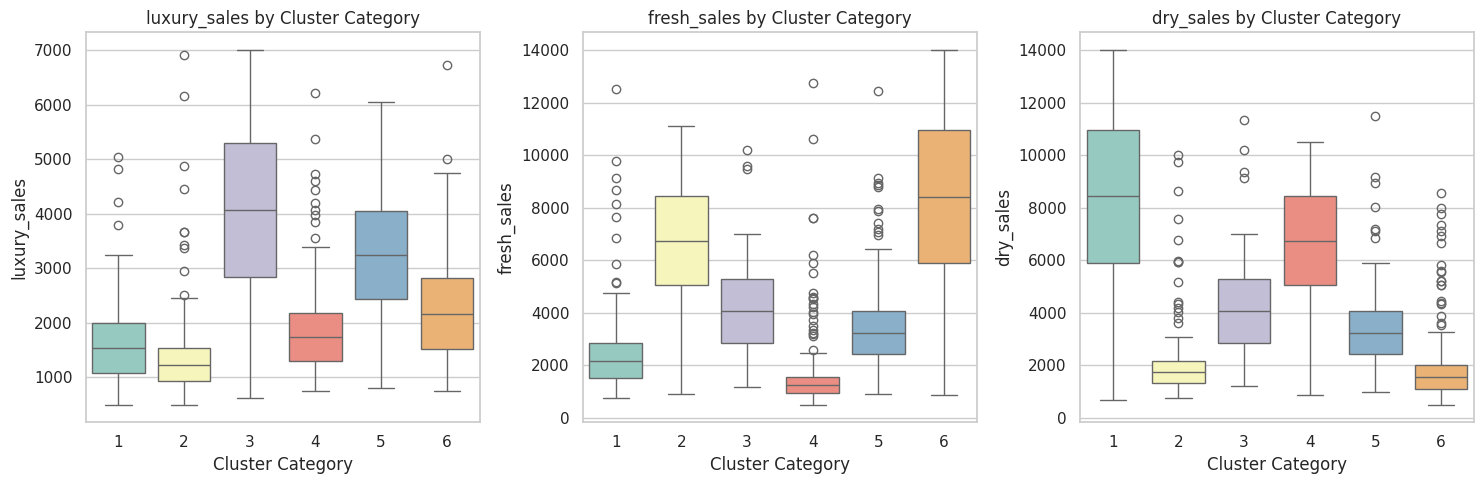

In [11]:
# Scatterplot of Sales Features vs Cluster Category
plt.figure(figsize=(15, 5))
for idx, feature in enumerate(sales_features, start=1):
    plt.subplot(1, 3, idx)
    sns.boxplot(x='cluster_category', y=feature, data=data, palette="Set3")
    plt.title(f"{feature} by Cluster Category")
    plt.xlabel("Cluster Category")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


In [12]:
# Feature Correlation with Target Variable
for feature in sales_features:
    correlation = data[feature].corr(data['cluster_category'])
    print(f"Correlation between {feature} and Cluster Category: {correlation:.2f}")


Correlation between luxury_sales and Cluster Category: 0.31
Correlation between fresh_sales and Cluster Category: 0.39
Correlation between dry_sales and Cluster Category: -0.47


<Figure size 1400x800 with 0 Axes>

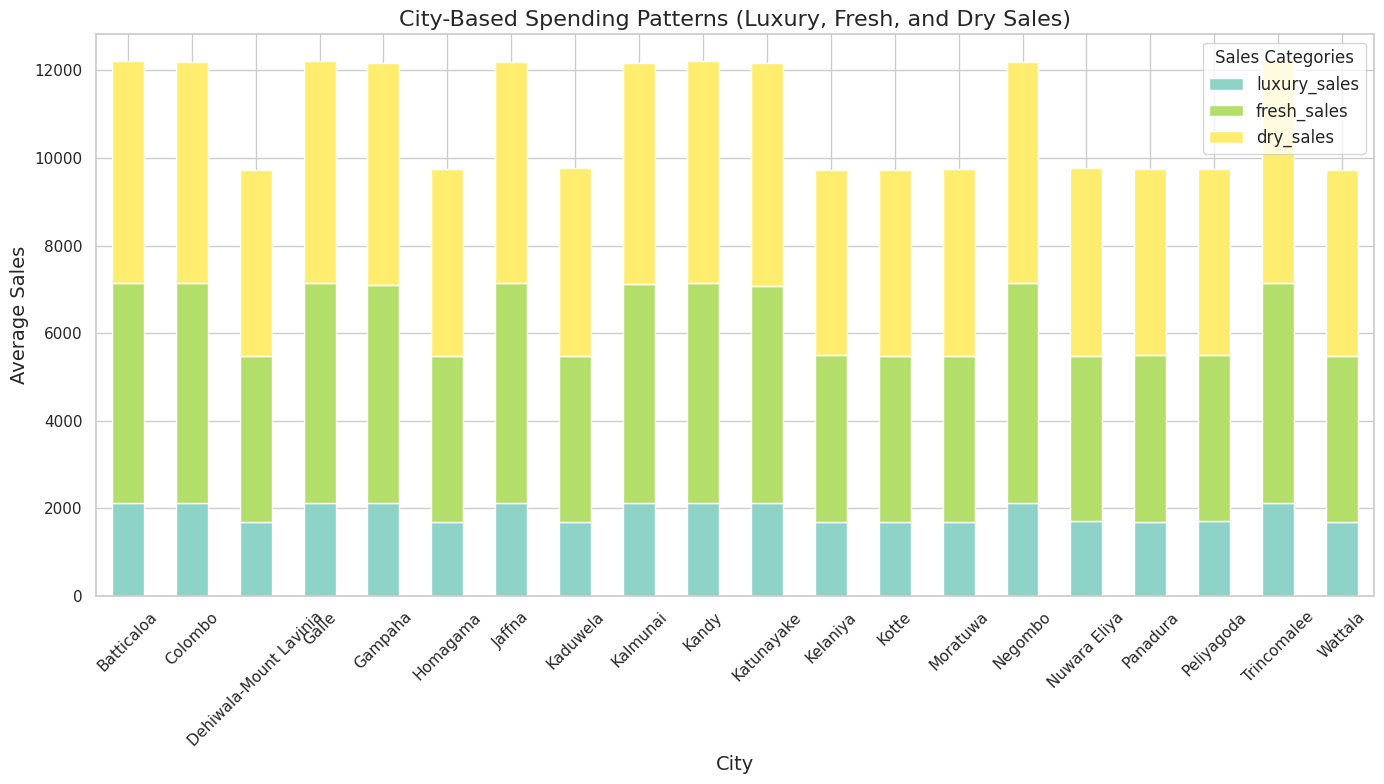

In [13]:
# Grouping data by city and calculating mean sales for each category
city_sales = data.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].mean()

# Plotting the sales distribution across cities
plt.figure(figsize=(14, 8))
city_sales.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='Set3')

# Adding labels and title
plt.title("City-Based Spending Patterns (Luxury, Fresh, and Dry Sales)", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Average Sales", fontsize=14)
plt.legend(title="Sales Categories", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()